# Programmieraufgabe 2  

<span style="font-weight: bold">Wichtig: Damit alle ben&ouml;tigten Pakete richtig eingebunden werden, f&uuml;hren Sie die n&auml;chste Zelle einmal aus.</span>

In [1]:
# some setup
%matplotlib inline
import numpy as np # makes numpy routines and data types available as np.[name ouf routine or data type]
import matplotlib.pyplot as plt # makes plotting command available as plt.[name of command]
from numpy import random
from ipywidgets import interactive
import scipy.stats

random.seed(0)

## a) Zahlenlotto
Simulieren Sie das bekannte Zahlenlotto (6 aus 49) ohne Zusatzzahl.<br>
<b>Eingabe:</b> Die Anzahl der Kugeln (zB: $m=49$), die Anzahl der zu ziehenden Kugeln (zB: $n=6$) einlesen. Ausserdem eine $n-$elementige Liste, die den Tip enth&auml;lt (zB: $L = [4,1,6,7,15,45]$ und die Anzahl $l$ der Ziehungen.<br>

<b>Ausgabe</b>: Die absoluten H&auml;ufigkeiten von von "Nullern", "Einern", "Zweiern", "Dreiern", "Vierern", "F&uuml;nfern" und "Sechsern". Dabei geht es nur um die Anzahlen der mit dem Tip getroffenen Zahlen, die Reihenfolge spielt keine Rolle </b> 



Definieren Sie zun&auml;chst eine Funktion <b>draw()</b>, die das "Ziehen ohne Zur&uuml;cklegen" realisiert. 

In [5]:
def draw(m=49,n=6):
    result=[] #set up list to fill with values
    i=0 
    while i<n: #do, while there arent n values in result
        x=random.randint(1,m+1,1) #create a single random integer
        if x not in result: #if it isnt in result 
            result.append(x[0]) #add it to result
            i+=1 #increment counter
    return sorted(result) 

    #result is a list of randomly drawn numbers out of {1,...,m}


[1, 4, 10, 40, 45, 48]


Wieviele Zahlen in den Listen $x$ und $y$ sind gleich? Dies soll die Funktion <b>compare()</b> liefern.

In [21]:
def compare(x,y): #assuming numbers only occur once per list
    count=0 #count the amount of equal values
    for i in range(0, len(x)): #go through all positions in x
        if x[i] in y: #if value x occurs in y
            count+=1 #increment counter
    return count
    #count is the number of equal entries in the lists x and y
    
print(compare([1,2,5,7],[1,2,4,5]))

3


In [23]:
#Main program

random.seed(0)

#input variables 
m = int(input("Anzahl der Kugeln: "))
n = int(input("Anzahl der zu ziehenden Kugeln: "))
l = int(input("Anzahl der Versuche: "))
x = (input("Tip: "))
#Input a list by [1,2,3,4,5,6]

#make x a list of integers
x=x.split(',')
x=[int(a) for a in x] #also checking if x consists of integers
#print(x)
#error handling
if len(x)!=n:
    raise ValueError("wrong amount of integers entered")
for a in x:
    if a>m or a<1:
        raise ValueError("you have to enter integers with valuees from 1 to ",m)
u,counts=np.unique(x, return_counts=True)
if max(counts)>1:
    raise ValueError("enter each number only once")


z = np.zeros(n) #0-array to increment, where exapctly that amount of numbers is equal

#draw n random numbers l times an check, how many elements of draw and tip are equal
for i in range(l):
    y = draw(m,n)
    equ = compare(x,y)
    z[equ] += 1;
print(z)


Anzahl der Kugeln: 49
Anzahl der zu ziehenden Kugeln: 6
Anzahl der Versuche: 1000
Tip: 23,13,42,25,1,2
[426. 431. 123.  18.   2.   0.]


#### b) W&uuml;rfeln 

(i)  Erzeugen Sie eine Liste mit $n = 100$ Zufallszahlen aus der Menge $\{ 1,2,3,4,5,6 \}$,
und bestimmen Sie, wie oft die Zahl 6 in der Liste vorkommt. 
Welche Verteilung hat die Zufallsvariable $Z(\omega)$, die dieses Zufallsexperiment modelliert?

(ii)  Wir wiederholen das Experiment nun $l = 1000$ mal. 
Speichern  Sie  in  einer  Liste $z$ die beobachteten (relativen) H&auml;ufigkeiten der Zahl 6 in jeder der $l$ Stichproben von jeweils $n$ Zufallszahlen.

(iii)  Die  Liste $z$ enth&auml;lt nun  $l$  (pseudozuf&auml;llige)  Realisierungen  der  Werte  der  Zufallsvariablen $Z$. 
Erstellen Sie ein Histogramm ($\texttt{numpy.histogram}$) von $z$. 
Zeichnen Sie das Histogramm in  ein  Diagramm  zusammen  mit  der  Massenfunktion ($\texttt{scipy.stats.binom.pmf}$) der  Zufallsvariablen $Z$ 
und vergleichen Sie.

(iv)  Erstellen Sie mithilfe von $\texttt{interactive}$ ein entsprechendes Histogramm f&uuml;r die ersten
$k$ Werte der Liste $z$, wobei $k$ zwischen 1 und $l$ variiert werden kann. Was beobachten Sie?

In [11]:
# model 100 dice throws

x=random.randint(1,7,100)

#how often does the number '6' occur
u,counts=np.unique(x, return_counts=True) 
print(counts)
print(counts[5])

[11 21 14 19 13 22]
22


In [25]:
# model 1000 tries (using different method)

#create matrix to show how many times value has been achieved(for each try)
mat=np.zeros((6,1000))

#to 1000 experiments and each time "roll dice" 100 times and increment entry, if value has been achieved
for l in range(0,1000):
    for i in range(0,100):
        mat[random.randint(0,6),l]+=1
        
#now create list with values for each experiment
z=[a for a in mat[5]]



<function matplotlib.pyplot.show>

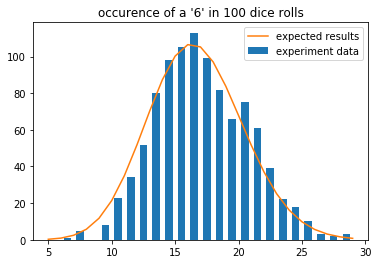

In [26]:
#create bins for histogramm
num_occur=[]

k=5
for i in range(25):
    num_occur.append(k)
    k+=1
    
#create histogramm 
plt.hist(z, num_occur, rwidth=0.6, label='experiment data')


z2=[]
for k in range(5,30):
    z2.append(scipy.stats.binom.pmf(k,100,1/6)*1000) #multiply with 1000, to correlate to 1000 experiments

#create plot
plt.plot(num_occur,z2, label='expected results')

plt.title("occurence of a '6' in 100 dice rolls")
plt.legend()
plt.show

In [32]:
def show_hist_to(k):
    plt.hist(z[:k], num_occur, rwidth=0.6)
w=interactive(show_hist_to,k=range(0,1001))

display(w)

interactive(children=(Dropdown(description='k', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810

###### print(random.randint(0,6))